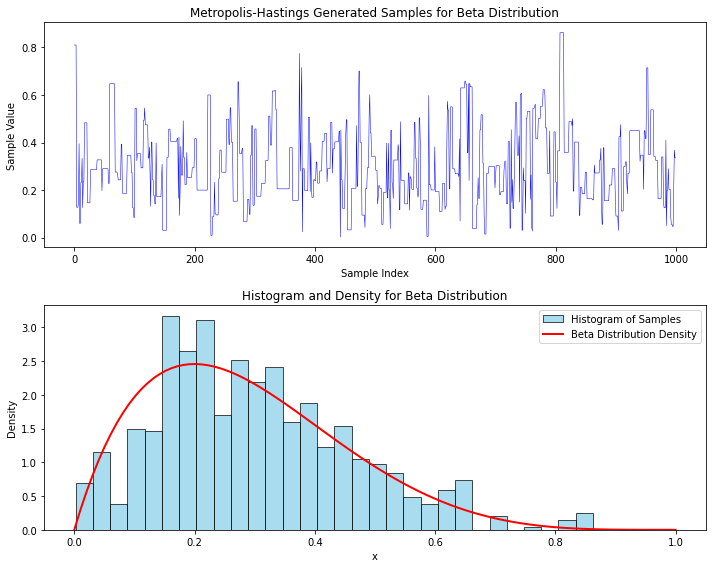

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta as beta_dist

alpha_param = 2.0
beta_param = 5.0

def beta_distribution(x, alpha, beta_param):
    epsilon = 1e-9
    x = np.clip(x, epsilon, 1 - epsilon)
    normalization_factor = beta_dist(alpha, beta_param).pdf(0.5)  
    return (x**(alpha - 1) * (1 - x)**(beta_param - 1)) / normalization_factor

def metropolis_hastings(target_dist, alpha, beta_param, num_samples=1000, proposal_width=0.5):
    samples = []
    current_sample = np.random.rand()
    
    for _ in range(num_samples):
        proposed_sample = np.clip(current_sample + np.random.normal(scale=proposal_width), 0, 1)
        
        acceptance_ratio = target_dist(proposed_sample, alpha, beta_param) / target_dist(current_sample, alpha, beta_param)
        
        if np.random.rand() < acceptance_ratio:
            current_sample = proposed_sample
        
        samples.append(current_sample)
    
    return np.array(samples)

samples = metropolis_hastings(beta_distribution, alpha_param, beta_param, num_samples=1000)

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(samples, color='blue', lw=0.5)
axs[0].set_title("Metropolis-Hastings Generated Samples for Beta Distribution")
axs[0].set_xlabel("Sample Index")
axs[0].set_ylabel("Sample Value")

x_vals = np.linspace(0, 1, 100)
true_pdf = beta_dist.pdf(x_vals, alpha_param, beta_param)

axs[1].hist(samples, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7, label="Histogram of Samples")
axs[1].plot(x_vals, true_pdf, color='red', lw=2, label="Beta Distribution Density")
axs[1].set_title("Histogram and Density for Beta Distribution")
axs[1].set_xlabel("x")
axs[1].set_ylabel("Density")
axs[1].legend()

plt.tight_layout()
plt.show()


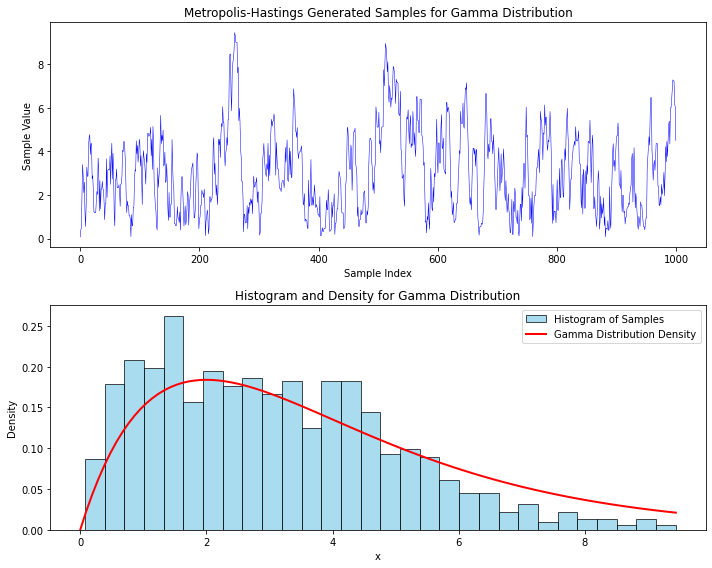

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma as gamma_func

alpha_param = 2.0  
theta_param = 2.0 

def gamma_distribution(x, alpha, theta):
    valid_x = x >= 0
    normalization_factor = theta**alpha * gamma_func(alpha)  
    return np.where(valid_x, (x**(alpha - 1) * np.exp(-x / theta)) / normalization_factor, 0)

def metropolis_hastings(target_dist, alpha, theta, num_samples=1000, proposal_width=1.0):
    samples = []
    current_sample = np.random.rand()  

    for _ in range(num_samples):
        proposed_sample = np.abs(current_sample + np.random.normal(scale=proposal_width))
        
        acceptance_ratio = target_dist(proposed_sample, alpha, theta) / target_dist(current_sample, alpha, theta)
        
        if np.random.rand() < acceptance_ratio:
            current_sample = proposed_sample
        
        samples.append(current_sample)
    
    return np.array(samples)

samples = metropolis_hastings(gamma_distribution, alpha_param, theta_param, num_samples=1000)

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(samples, color='blue', lw=0.5)
axs[0].set_title("Metropolis-Hastings Generated Samples for Gamma Distribution")
axs[0].set_xlabel("Sample Index")
axs[0].set_ylabel("Sample Value")

x_vals = np.linspace(0, np.max(samples), 100)
true_pdf = gamma_distribution(x_vals, alpha_param, theta_param)

axs[1].hist(samples, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7, label="Histogram of Samples")
axs[1].plot(x_vals, true_pdf, color='red', lw=2, label="Gamma Distribution Density")
axs[1].set_title("Histogram and Density for Gamma Distribution")
axs[1].set_xlabel("x")
axs[1].set_ylabel("Density")
axs[1].legend()

plt.tight_layout()
plt.show()


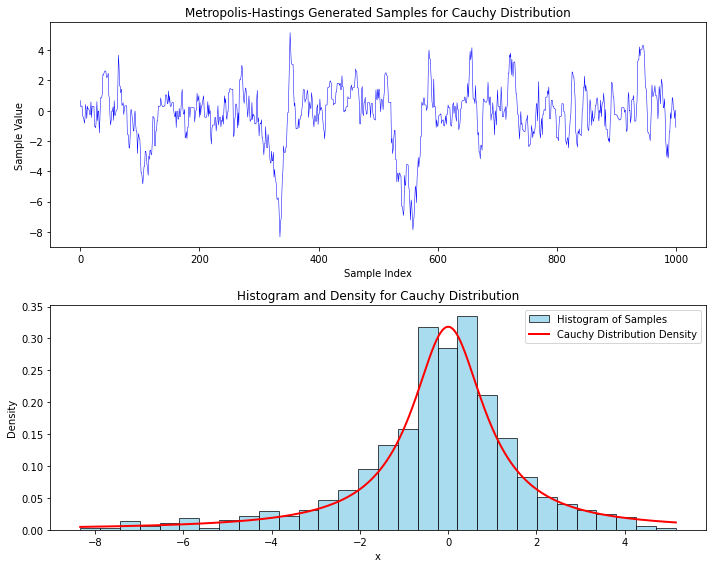

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x0_param = 0.0  
gamma_param = 1.0 

def cauchy_distribution(x, x0, gamma):
    return (1 / (gamma * np.pi)) * (gamma**2 / ((x - x0)**2 + gamma**2))

def metropolis_hastings(target_dist, x0, gamma, num_samples=1000, proposal_width=1.0):
    samples = []
    current_sample = np.random.rand() 

    for _ in range(num_samples):
        proposed_sample = current_sample + np.random.normal(scale=proposal_width)
        
        acceptance_ratio = target_dist(proposed_sample, x0, gamma) / target_dist(current_sample, x0, gamma)
        
        if np.random.rand() < acceptance_ratio:
            current_sample = proposed_sample
        
        samples.append(current_sample)
    
    return np.array(samples)

samples = metropolis_hastings(cauchy_distribution, x0_param, gamma_param, num_samples=1000)

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(samples, color='blue', lw=0.5)
axs[0].set_title("Metropolis-Hastings Generated Samples for Cauchy Distribution")
axs[0].set_xlabel("Sample Index")
axs[0].set_ylabel("Sample Value")

x_vals = np.linspace(min(samples), max(samples), 1000)
true_pdf = cauchy_distribution(x_vals, x0_param, gamma_param)

axs[1].hist(samples, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7, label="Histogram of Samples")
axs[1].plot(x_vals, true_pdf, color='red', lw=2, label="Cauchy Distribution Density")
axs[1].set_title("Histogram and Density for Cauchy Distribution")
axs[1].set_xlabel("x")
axs[1].set_ylabel("Density")
axs[1].legend()

plt.tight_layout()
plt.show()
